In [1]:
from __future__ import print_function, division
import os
from collections import OrderedDict
import logging

import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
# Make the plots look pretty
matplotlib.rc('font',size=13)
matplotlib.rc('legend', numpoints=1)
matplotlib.rc('image', cmap='inferno')
matplotlib.rc('image', interpolation='none')
# Use the same color cylcer as Seaborn
from cycler import cycler
color_cycle = [u'#4c72b0', u'#55a868', u'#c44e52', u'#8172b2', u'#ccb974', u'#64b5cd']
matplotlib.rcParams['axes.prop_cycle'] = cycler("color", color_cycle)

import lsst.afw.table as afwTable
import lsst.log as log
import lsst.meas.deblender
from lsst.meas.deblender import nmf, proximal
import lsst.meas.deblender.utils as debUtils

logger = logging.getLogger("lsst.meas.deblender")
logger.setLevel(logging.INFO)
log.setLevel("", log.INFO)

INFO:lsst.meas.deblender:Total parents: 41
INFO:lsst.meas.deblender:Unblended sources: 25
INFO:lsst.meas.deblender:Sources with multiple peaks: 16


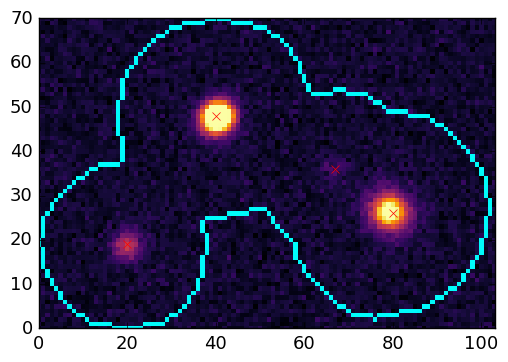

In [2]:
dataPath = os.path.abspath(os.path.join(os.path.dirname(os.path.realpath('__file__')), '..','data', 'sim_data'))
filters = ["g","r", "i","z",'y']
imgFilename = os.path.join(dataPath, "test2/{0}_{1}.fits")
catFilename = os.path.join(dataPath, "test2/det_merge.fits")
simFilename = os.path.join(dataPath, "test2/catalog_true.fits")

expDb = proximal.ExposureDeblend(filters, imgFilename, catFilename, simFilename)
footprint, peaks = expDb.getParentFootprint(parentIdx=0, condition=expDb.mergedTable["peaks"]==4, fidx=1)

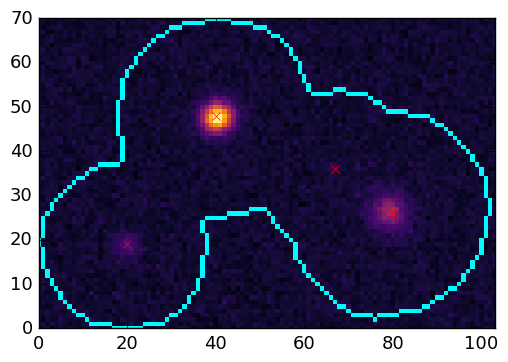

constraints MMMM
0 0.0149262599287 0 1.12306075679 999 [1, 1, 1, 1]
1 2.51421978848e-05 354 0.848004354258 334 [4339, 4492, 3879, 4247]
2 1.97572136389e-05 307 0.636475681069 159 [4757, 4637, 4765, 4771]
3 1.4822078266e-05 144 0.477284294831 101 [4692, 4421, 4686, 4629]
4 1.11237666938e-05 173 0.35782867654 75 [4426, 4102, 4645, 4375]
5 8.34898001062e-06 201 0.268242755244 60 [4387, 3967, 4565, 4332]
6 6.26323551022e-06 232 0.201092187983 50 [4542, 4284, 4785, 4497]
7 4.69796622181e-06 261 0.15078251548 43 [4763, 4458, 4765, 4570]
8 3.52357151421e-06 0 0.113086879613 38 [4941, 4548, 4672, 4598]
9 2.64260195586e-06 1 0.0848151548233 34 [5084, 4724, 4698, 4701]
10 1.98185733087e-06 0 0.0636113664917 37 [5219, 4921, 4859, 4837]


INFO:lsst.meas.deblender:Filter g
INFO:lsst.meas.deblender:Pixel range: -0.447213292122 to 12.333483696
INFO:lsst.meas.deblender:Max difference: 0.397445887327
INFO:lsst.meas.deblender:Residual difference 5.2%
INFO:lsst.meas.deblender:Filter r
INFO:lsst.meas.deblender:Pixel range: -0.447213292122 to 12.333483696
INFO:lsst.meas.deblender:Max difference: 0.451697812808
INFO:lsst.meas.deblender:Residual difference 10.1%
INFO:lsst.meas.deblender:Filter i
INFO:lsst.meas.deblender:Pixel range: -0.447213292122 to 12.333483696
INFO:lsst.meas.deblender:Max difference: 0.38583966406
INFO:lsst.meas.deblender:Residual difference 7.5%
INFO:lsst.meas.deblender:Filter z
INFO:lsst.meas.deblender:Pixel range: -0.447213292122 to 12.333483696
INFO:lsst.meas.deblender:Max difference: 0.378056228161
INFO:lsst.meas.deblender:Residual difference 8.9%
INFO:lsst.meas.deblender:Filter y
INFO:lsst.meas.deblender:Pixel range: -0.447213292122 to 12.333483696
INFO:lsst.meas.deblender:Max difference: 0.397954896011


11 1.48627088032e-06 0 0.0477085255232 40 [5104, 4766, 4737, 4693]


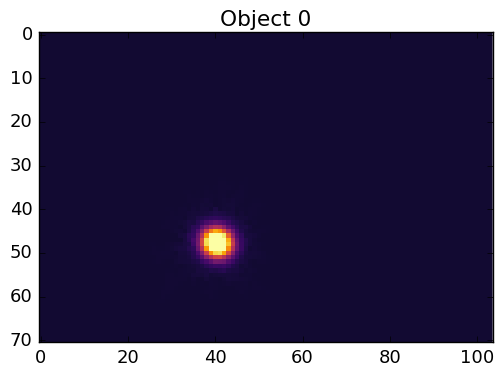

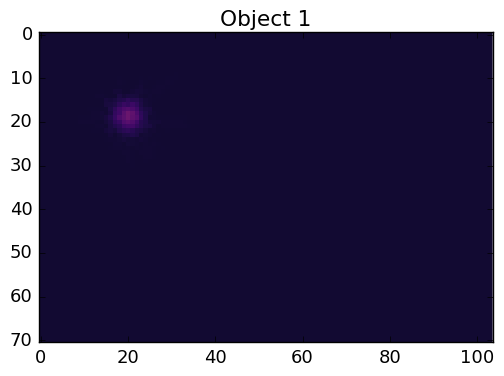

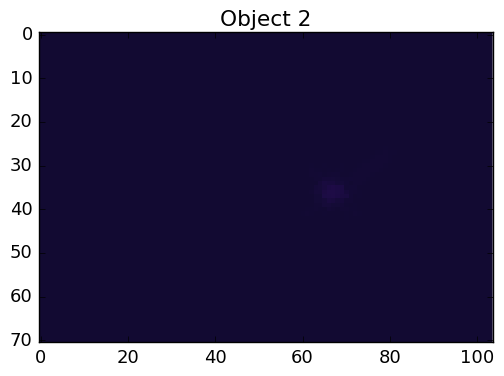

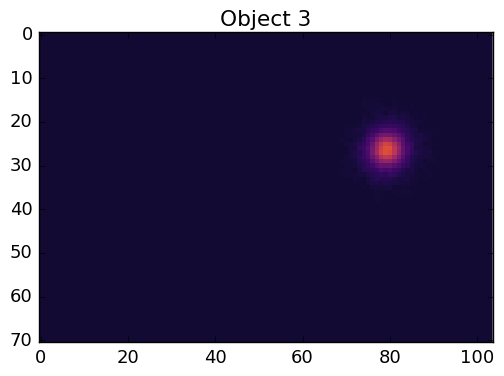

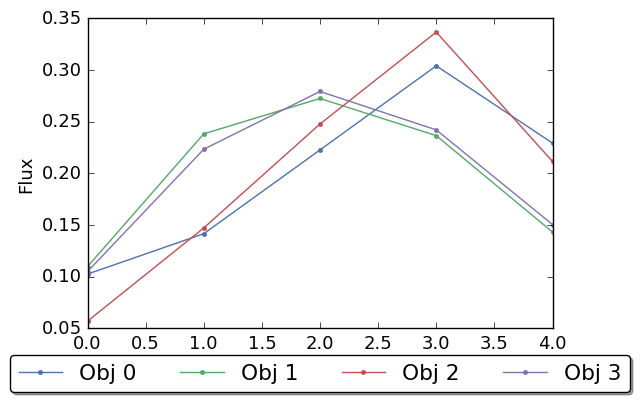

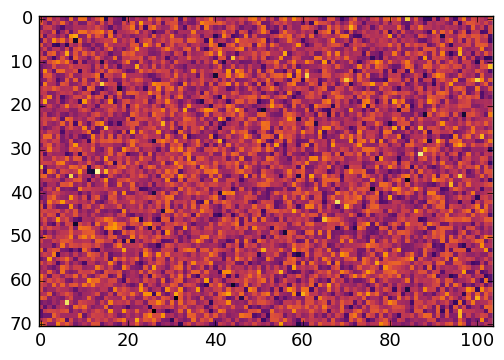

In [3]:
deblend = expDb.deblendParent(condition=expDb.mergedTable["peaks"]==4, display=True)

# Show the templates again without scaling to the original image

Scaling to the individual templates allows us to see the behavior of the low-flux pixels in the templates

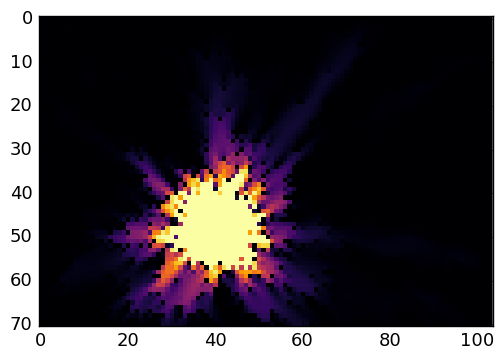

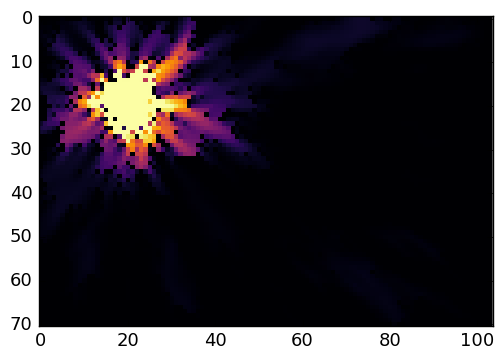

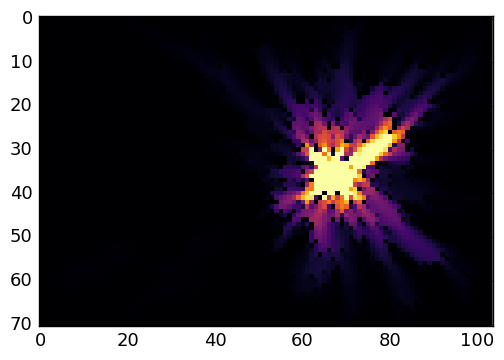

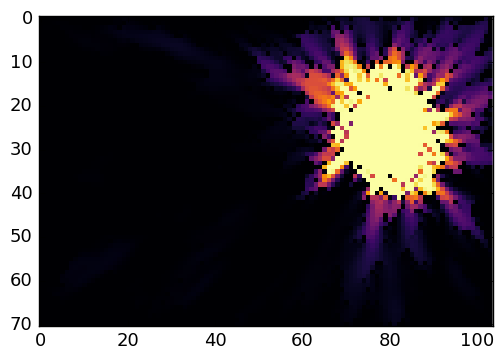

In [4]:
for intensity in deblend.intensities:
    vmin, vmax = debUtils.zscale(intensity)
    plt.imshow(intensity, vmin=0, vmax=20*vmax)
    plt.show()

# Test the deblender with a symmetry constraint

We see that the results of the symmetry deblender look more like galaxies... but the monotonicity deblender does a much better job at matching the flux.

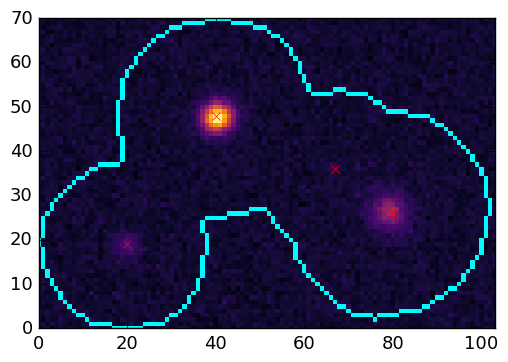

constraints SSSS
0 0.0149262599287 0 1.12306075679 999 [1, 1, 1, 1]
1 1.61851962754e-05 216 0.595544955209 999 [2158, 1121, 2691, 1358]
2 1.83382464615e-05 582 0.627694863064 999 [2261, 1089, 2915, 1554]
3 1.57229200213e-05 401 0.48458938477 999 [1852, 928, 2453, 1282]
4 1.21340822591e-05 154 0.364338247784 999 [1799, 902, 2430, 1213]
5 9.19436816722e-06 75 0.27328411212 999 [1719, 828, 2370, 1163]
6 6.93288611918e-06 80 0.204954315564 999 [1688, 807, 2350, 1148]
7 5.21861446955e-06 90 0.153710887691 999 [1692, 799, 2331, 1134]
8 3.92444915248e-06 98 0.115280658176 999 [1674, 800, 2309, 1128]
9 2.9491596186e-06 104 0.0864590045094 999 [1691, 794, 2310, 1120]
10 2.21511922893e-06 0 0.0648442490716 999 [1675, 784, 2296, 1112]
11 1.66316576622e-06 0 0.0486331827309 999 [1659, 778, 2278, 1102]
12 1.24839918692e-06 0 0.0364748840913 999 [1656, 773, 2267, 1101]
13 9.36875110871e-07 0 0.0273561611333 999 [1646, 772, 2262, 1097]
14 7.02979938681e-07 0 0.0205171196493 999 [1643, 773, 2255, 1093

INFO:lsst.meas.deblender:Filter g
INFO:lsst.meas.deblender:Pixel range: -0.447213292122 to 12.333483696
INFO:lsst.meas.deblender:Max difference: 0.584886002827
INFO:lsst.meas.deblender:Residual difference 20.9%
INFO:lsst.meas.deblender:Filter r
INFO:lsst.meas.deblender:Pixel range: -0.447213292122 to 12.333483696
INFO:lsst.meas.deblender:Max difference: 0.73806133858
INFO:lsst.meas.deblender:Residual difference 22.5%
INFO:lsst.meas.deblender:Filter i
INFO:lsst.meas.deblender:Pixel range: -0.447213292122 to 12.333483696
INFO:lsst.meas.deblender:Max difference: 0.895828503842
INFO:lsst.meas.deblender:Residual difference 20.1%
INFO:lsst.meas.deblender:Filter z
INFO:lsst.meas.deblender:Pixel range: -0.447213292122 to 12.333483696
INFO:lsst.meas.deblender:Max difference: 1.25883376924
INFO:lsst.meas.deblender:Residual difference 23.8%
INFO:lsst.meas.deblender:Filter y
INFO:lsst.meas.deblender:Pixel range: -0.447213292122 to 12.333483696
INFO:lsst.meas.deblender:Max difference: 1.04418943134

39 5.29729954588e-10 0 1.54400210474e-05 999 [1635, 765, 2233, 1087]


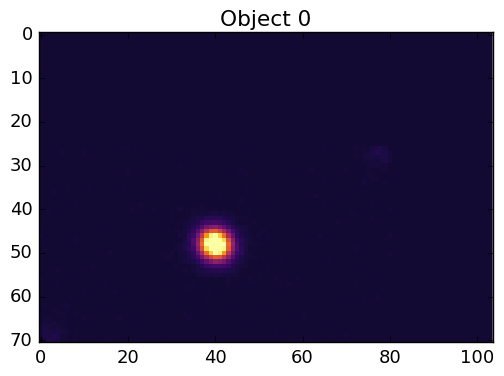

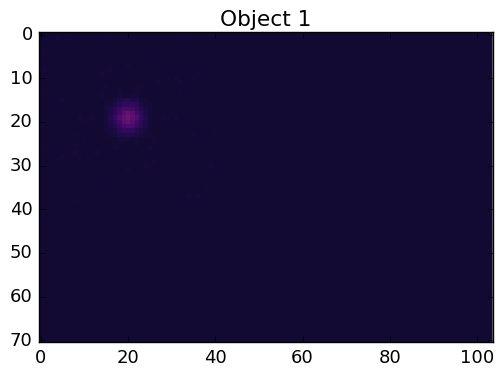

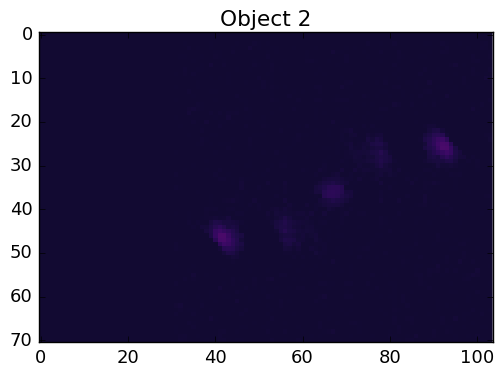

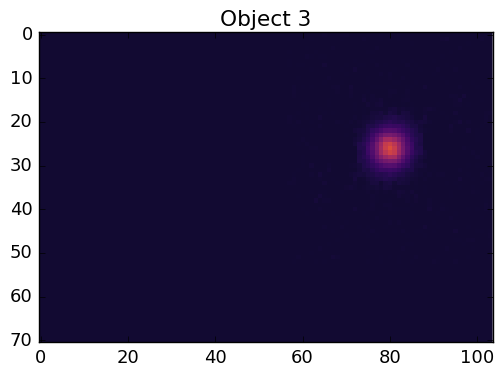

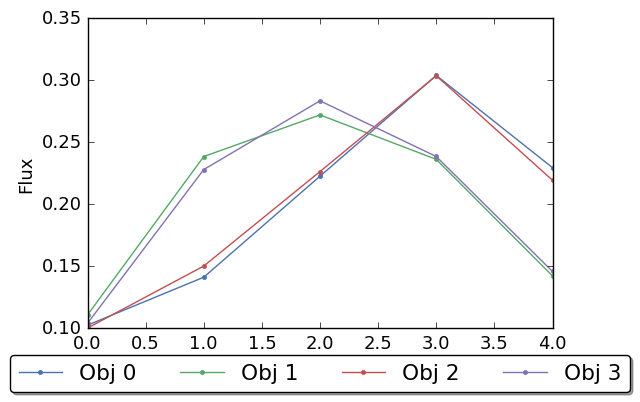

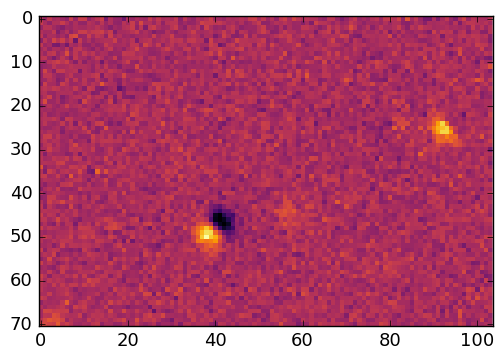

In [5]:
deblend = expDb.deblendParent(condition=expDb.mergedTable["peaks"]==4, display=True, constraints="S")

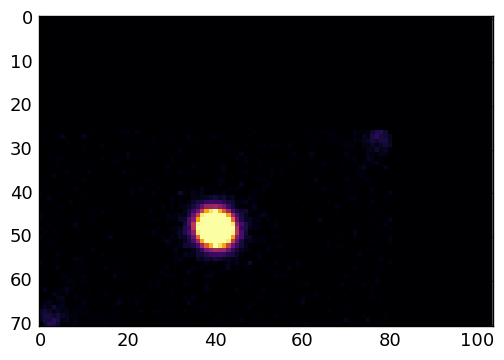

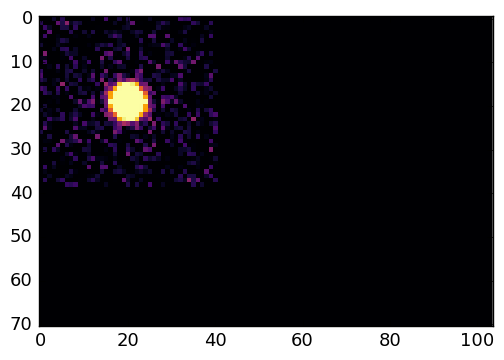

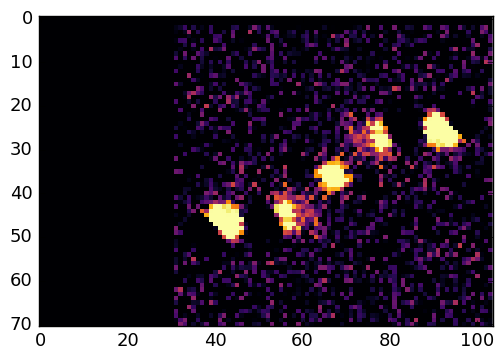

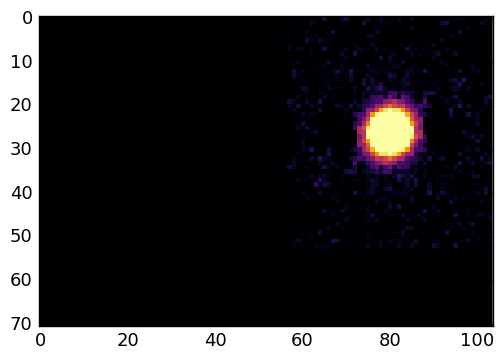

In [6]:
for intensity in deblend.intensities:
    vmin, vmax = debUtils.zscale(intensity)
    plt.imshow(intensity, vmin=0, vmax=np.max(intensity)/5)
    plt.show()